<h1>Содержание<span class="tocSkip"></span></h1>
</span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Необходимо спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Построим модель с предельно большим значением *F1*-меры. Для успешной сдачи проекта нужно довести метрику до 0.59. Необходимо проверить *F1*-меру на тестовой выборке.

Дополнительно измерим *AUC-ROC*, сравнивая её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Признаки**
- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

**Целевой признак**
- `Exited` — факт ухода клиента

## Подготовка данных

Импортируем и изучим данные. Так как они взяты с kaggle.com, они, видимо, частично подготовлены.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('/Users/sirotadmitry/github_projects/first-project/Churn.csv')
display(data.sample(10))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
990,991,15745527,Burke,655,France,Male,37,5.0,93147.00,2,1,0,66214.13,0
7272,7273,15666166,Pettry,653,France,Female,74,0.0,121276.32,1,1,1,160348.31,0
1375,1376,15574004,Mancini,429,France,Female,27,6.0,117307.44,2,1,1,24020.49,0
5642,5643,15737778,Dickson,782,Spain,Female,41,4.0,0.00,1,1,0,132943.88,0
7474,7475,15799859,Lucchesi,704,France,Male,50,4.0,165438.26,1,1,0,120770.75,1
609,610,15586585,Duncan,698,Germany,Female,51,2.0,111018.98,1,1,0,86410.28,0
9105,9106,15685476,Tseng,658,France,Male,31,5.0,100082.14,1,0,1,49809.88,0
9824,9825,15658980,Matthews,711,Germany,Male,26,9.0,128793.63,1,1,0,19262.05,0
7892,7893,15707025,Fang,648,Spain,Female,31,5.0,0.00,2,1,1,5199.02,0
2307,2308,15732020,Rutherford,610,Germany,Male,57,6.0,106938.11,2,0,1,186612.47,0


In [3]:
display(data.describe())

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Выбросов в данных не наблюдается.

In [4]:
display(data.shape)

(10000, 14)

В датафрейме 10000 строк и 14 столбцов. В наличии категориальные столбцы: `Surname`, `Geography`, `Gender`. В некоторых фамилиях нераспознанные символы, заменены на символ "?". В столбце `Balance` есть отсутствующие данные.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В столбце `Tenure` есть отсутствующие данные (909 шт.)

Удалим пропущенные значения в датафрейме.

In [6]:
data = data.dropna()

Посмотрим оригинальные данные в столбцах `Surname`, `Gender` и `Geofraphy`. В столбцах `Gender` и `Geofraphy` посчитаем количество оригинальных значений.

In [7]:
data['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

Очевидно, что столбец `Surname` с уникальными фамилиями соотносится сто столбцом `CustomerId`. По этой причине столбец `Surname` предобрабатывать не будем. Удалим столбец `Surname`, так как он не участвует в дальнейшем анализе.

In [8]:
data = data.drop(['Surname'], axis=1)

In [9]:
data['Geography'].value_counts()

France     4550
Germany    2293
Spain      2248
Name: Geography, dtype: int64

In [10]:
data['Gender'].value_counts()

Male      4974
Female    4117
Name: Gender, dtype: int64

Проведем обработку категориальных признаков в столбцах `Gender` и `Geofraphy` техникой One-Hot-Encoding. Кроме того, промасштабируем данные. Совместим кодирование категориальных и масштабирование численных признаков.

Разобъем данные на три выборки: обучающую(60%), валидационную (20%) и тестовую (20%). Напечатаем размеры получившихся наборов.

In [11]:
data_ohe = pd.get_dummies(data, drop_first=True) # OHE
# Разбиение данных на три выборки: обучающую(60%), валидационную (20%) и тестовую (20%)
data_train, data_valid, data_test = np.split(data_ohe.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])
# Напечатаем размеры получившихся наборов
display(data_train.shape)
display(data_valid.shape)
display(data_test.shape)

numeric = ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
           'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target_train = data_train['Exited']
features_train = data_train.drop('Exited', axis=1)
target_valid = data_valid['Exited']
features_valid = data_valid.drop('Exited', axis=1)

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
# Напечатаем размер features_train для проверки
display(features_train.shape) 

(5454, 14)

(1818, 14)

(1819, 14)

(5454, 13)

**Вывод**

Удалили столбец `Surname`. Удалили строки с пропущенными значениями.

Провели обработку категориальных признаков в столбцах `Gender` и `Geofraphy` техникой One-Hot-Encoding.

Разбили данные на три выборки: обучающую (60%), валидационную (20%) и тестовую (20%).

## Исследование задачи

Рассмотрим алгоритм классификации "Случайный лес" с гиперпараметром n_estimators от 1 до 20, max_depth от 1 до 20, min_samples_split и min_samples_leaf от 1 до 2.

In [12]:
best_estimators = None
best_max_depth_1 = None
best_min_samples_split_1 = 1
best_min_samples_leaf_1 = None
best_result_1 = 0

for est in range(1, 21):
    for depth in range (1,21):
        for samples_split in range(2,3):
            for samples_leaf in range(2,3):
                model_rf_1 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, min_samples_split = samples_split, min_samples_leaf = samples_leaf) # обучение модели
                model_rf_1.fit(features_train, target_train) # обучение модели на тренировочной выборке
                predicted_valid_rf_1 = model_rf_1.predict(features_valid) # предсказание
                result_1 = accuracy_score(target_valid, predicted_valid_rf_1) # качество модели на валидационной выборке
                if result_1 > best_result_1:
                    best_estimators = est
                    best_max_depth_1 = depth
                    best_min_samples_split_1 = samples_split
                    best_min_samples_leaf_1 = samples_leaf
                    
                    best_result_1 = result_1 #  сохранение наилучшего значения метрики accuracy на валидационных данных

print("Accuracy наилучшей модели при n_estimators = ", best_estimators, ", max_depth = ", best_max_depth_1, ", min_samples_split=", best_min_samples_split_1, ", min_samples_leaf =",  best_min_samples_leaf_1, "на валидационной выборке:", best_result_1)



Accuracy наилучшей модели при n_estimators =  19 , max_depth =  13 , min_samples_split= 2 , min_samples_leaf = 2 на валидационной выборке: 0.8811881188118812


In [13]:
print(f1_score(target_valid, predicted_valid_rf_1))

0.578096947935368


Значение F1-меры для модели случайного леса равно 0.57.

**Вывод**

Значение F1-меры для наилучшей модели случайного леса при n_estimators =  19 , max_depth =  13,  min_samples_split= 2 , min_samples_leaf = 2 равно 0.57.

## Борьба с дисбалансом

Сбалансируем модель случайного леса. Сделаем веса классов сбалансированными.

In [14]:
model_rf_2 = RandomForestClassifier(random_state=12345, n_estimators=16, max_depth=9, min_samples_split= 2, min_samples_leaf = 2, class_weight='balanced')
model_rf_2.fit(features_train, target_train)
predicted_valid_rf_2 = model_rf_2.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid_rf_2))

F1: 0.5886990801576873


Изменим значение порога для случайного леса и посмотрим, какой станет метрика F1.

**Вывод**

Проведена борьба с дисбалансом модели случайного леса. Проведена балансировка (F1 = 0.58).

## Тестирование модели

Протестируем модель, предварительно прошкалировав данные и увеличив выборку в два раза (repeat = 3).

In [15]:
features_test = data_test.drop('Exited', axis=1)
target_test = data_test['Exited']

scaler = StandardScaler()
scaler.fit(features_test[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

predictions_test = model_rf_2.predict(features_test)
print("F1:", f1_score(target_test, predictions_test))

F1: 0.6061349693251534


Для выбранной модели случайного леса метрика F1 при тестировании составила 0.60.

Изучим значения метрики AUC-ROC.

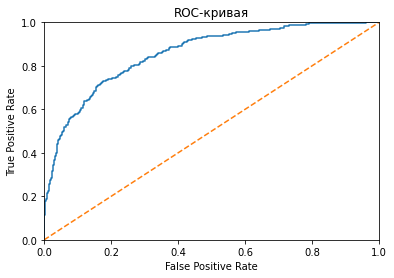

In [16]:
probabilities_valid_test = model_rf_2.predict_proba(features_test)
probabilities_one_valid_test = probabilities_valid_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid_test)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [17]:
auc_roc = roc_auc_score(target_test, probabilities_one_valid_test)

display(auc_roc)

0.8559075513050408

Значение AUC-ROC = 0.84 и близко к единице. Значение AUC-ROC случайной модели равно 0.5. Наша модель сильно отличается от случайной.

**Вывод**

Для выбранной модели случайного леса метрика F1 при тестировании составила 0.60.

Значение AUC-ROC = 0.84 и близко к единице. Значение AUC-ROC случайной модели равно 0.5. Наша модель сильно отличается от случайной.

## Общие выводы

Удалили столбец `Surname`. Удалили строки с пропущенными значениями.

Провели обработку категориальных признаков в столбцах `Gender` и `Geofraphy` техникой One-Hot-Encoding.

Разбили данные на три выборки: обучающую (60%), валидационную (20%) и тестовую (20%).

Значение F1-меры для наилучшей модели случайного леса при n_estimators =  19 , max_depth =  13, min_samples_split= 2, min_samples_leaf = 2 равно 0.57.

Проведена борьба с дисбалансом модели случайного леса. Проведена балансировка (F1 = 0.60).

Для выбранной модели случайного леса метрика F1 при тестировании составила 0.60.

Значение AUC-ROC = 0.84 и близко к единице. Значение AUC-ROC случайной модели равно 0.5. Наша модель сильно отличается от случайной.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*